In [1]:
import tensorflow as tf
import tensorflow.contrib as tf_contrib
import numpy as np
import functools

batchSize = 64
nrClass = 2

In [18]:
def minibatchGen():
    while True:
        iptData = np.zeros((batchSize,2))
        label = np.zeros(batchSize,dtype = np.int32)
    
        for i in range(batchSize): # 把XOR改成AND则使用一层感知机就可以实现
            iptData[i,:] = np.random.randint(0,2,2) # 产生的样本位于[-1,1]之间
            label[i] = 0 if(np.prod(iptData[i])) < 0 else 1 # 
    
        yield{'data':iptData.astype(np.float32),'label':label}
        
    

In [19]:
# init
weight_init = tf_contrib.layers.variance_scaling_initializer(factor=1.0, mode='FAN_IN', uniform=False) # 权重
bias_init = tf.zeros_initializer() # 误差
# fc_layer = functools.partial(tf.layers.dense, kernel_initializer=weight_init, bias_initializer=bias_init) # 全连接层

# setup inputs
data = tf.placeholder(tf.float32, shape=(None, 2), name='data') # input data is Nonex2, None means any value, 2 is feature size
label = tf.placeholder(tf.int32, shape=(None, ), name='label') # label indicates the categories of input features
label_onehot = tf.one_hot(label, nrClass, dtype=tf.int32) # convert the format of label to onehot

# build a network
# fc0 = tf.layers.dense(inputs=data, units=14,  activation=tf.nn.tanh)
# fc1 = tf.layers.dense(inputs=fc0, units=14, activation=tf.nn.tanh)
logits = tf.layers.dense(inputs=data, units=2)

preds = tf.nn.softmax(logits)
loss = tf.losses.softmax_cross_entropy(label_onehot, preds) # 交叉熵作为损失函数

# set a performance metric
correct_pred = tf.equal(tf.cast(tf.argmax(preds, 1), dtype=tf.int32), # cast是用来数据转换的
                        tf.cast(tf.argmax(label_onehot, 1), dtype=tf.int32))
acc = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [20]:
train_data = minibatchGen()
test_data  =minibatchGen()

trainLoss = []
trainAcc = []
testLoss = []
testAcc = []

opt = tf.train.MomentumOptimizer(learning_rate = 0.01,momentum=0.9)
train=opt.minimize(loss)
tf.set_random_seed(12345)

# print(123412341234)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # 初始化
    for step, minibatch in enumerate(train_data):
        # print(step)
        if step > 2000:
            break;
            
        fd  = {data:minibatch['data'],label:minibatch['label']}
        _, _loss, _acc = sess.run([train,loss,acc],feed_dict = fd)
        trainLoss.append((step,_loss))
        trainAcc.append((step,_acc))
        
        if step % 50 == 0:
            minibatch = next(test_data)
            fd = {data:minibatch['data'],label:minibatch['label']}
            _loss,_acc = sess.run([loss,acc],feed_dict = fd)
            testLoss.append((step,_loss))
            testAcc.append((step,_acc))
            print("epoch " + str(step) + ": loss: " + str(_loss) + " acc: " + str(_acc))
            
print("training is over")

epoch 0: loss: 0.8762784 acc: 0.234375
epoch 50: loss: 0.39514545 acc: 1.0
epoch 100: loss: 0.35179445 acc: 1.0
epoch 150: loss: 0.3361213 acc: 1.0
epoch 200: loss: 0.33038068 acc: 1.0
epoch 250: loss: 0.32809383 acc: 1.0
epoch 300: loss: 0.32566562 acc: 1.0
epoch 350: loss: 0.3245533 acc: 1.0
epoch 400: loss: 0.32266656 acc: 1.0
epoch 450: loss: 0.321556 acc: 1.0
epoch 500: loss: 0.32208407 acc: 1.0
epoch 550: loss: 0.3198123 acc: 1.0
epoch 600: loss: 0.32004654 acc: 1.0
epoch 650: loss: 0.31984732 acc: 1.0
epoch 700: loss: 0.31918532 acc: 1.0
epoch 750: loss: 0.31897628 acc: 1.0
epoch 800: loss: 0.31842285 acc: 1.0
epoch 850: loss: 0.31841403 acc: 1.0
epoch 900: loss: 0.31755605 acc: 1.0
epoch 950: loss: 0.3175756 acc: 1.0
epoch 1000: loss: 0.31743032 acc: 1.0
epoch 1050: loss: 0.31740826 acc: 1.0
epoch 1100: loss: 0.3170467 acc: 1.0
epoch 1150: loss: 0.3164832 acc: 1.0
epoch 1200: loss: 0.3161815 acc: 1.0
epoch 1250: loss: 0.3165201 acc: 1.0
epoch 1300: loss: 0.31672287 acc: 1.0
epo

<IPython.core.display.Javascript object>


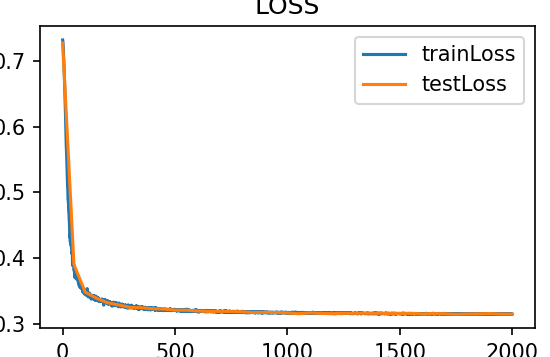

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

plt.figure()
plt.title("LOSS")
for xy, name in ((trainLoss, 'trainLoss'), (testLoss, 'testLoss'), ):
    xy = np.array(xy)
    # print(xy)
    x, y = xy[:,0], xy[:,1]
    plt.plot(x, y, label=name)

plt.legend()
plt.tight_layout()




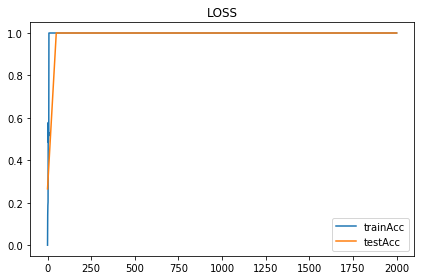

In [13]:
plt.figure()
plt.title("LOSS")
for xy, name in ((trainAcc, 'trainAcc'), (testAcc, 'testAcc'), ):
    xy = np.array(xy)
    # print(xy)
    x, y = xy[:,0], xy[:,1]
    plt.plot(x, y, label=name)

plt.legend()
plt.tight_layout()